 **Исследование сервиса аренды самокатов** 
 
В нашем распоряжении данные сервиса аренды самокатов GoFast. Имеются данные о некоторых пользователях из нескольких городов, а также об их поездках. Также имеются данные о типах тарифов при аренде самокатов. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки или с подпиской Ultra, имеющих разные условия. Основная задача проекта заключается в анализе данных и проверке некоторых гипотез, которые могут помочь бизнесу вырасти.

 **Цель исследования**
 
Цель проекта заключается в анализе данных популярного сервиса аренды самокатов GoFast, а именно:
1. Проанализировать основную информацию о пользователях сервисом.
2. Определить основные характеристики поездок на тарифах с подпиской и без.
3. Определить помесячную выручку для каждого пользователя.
4. Проверить ряд гипотез для решения задачи увеличения количества пользователей с подпиской.

**Ход исследования**

Данные для исследования получены из трех датафреймов. В основных данных есть информация о пользователях, их поездках и подписках (Пользователи — users_go.csv; Поездки — rides_go.csv; Подписки — subscriptions_go.csv). О качестве данных ничего не известно, поэтому понадобится их обзор.

Данные будут проверены на ошибки. На этапе предобработки будет рассмотрена возможность устранения ошибок, при их наличии. Далее данные будут объединены в общий датафрейм, а также созданы дополнительные датафреймы для решения поставленных задач.

Таким образом, исследование будет состоять из следующих этапов:
- обзор данных;
- предобработка данных;
- исследовательский анализ данных;
- объединение данных;
- подсчет выручки;
- проверка гипотез;
- основные выводы.


In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st
import missingno as msno
from math import sqrt
from scipy.stats import binom, poisson
pd.options.display.max_columns = 20

#### Шаг 1. Загрузка данных

Прочитаем файлы с данными и посмотрим основную информацию.

Рассмотрим таблицу с данными по пользователям.

In [3]:
users = pd.read_csv('/datasets/users_go.csv')

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
users.shape

(1565, 5)

Рассмотрим таблицу с поездками.

In [7]:
riders = pd.read_csv('/datasets/rides_go.csv')

In [8]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Приведем столбцы с дистанцией и продолжительностью поездки к типу float32 для экономии вычислительной памяти.

In [9]:
riders['distance'] = riders['distance'].astype('float32')

In [10]:
riders['duration'] = riders['duration'].astype('float32')

In [11]:
riders.head(10)

,user_id,distance,duration,date
0,1,4409.918945,25.599770,2021-01-01
1,1,2617.592041,15.816872,2021-01-18
2,1,754.159790,6.232113,2021-04-20
3,1,2694.783203,18.511000,2021-08-11
4,1,4028.687256,26.265802,2021-08-28
5,1,2770.890869,16.650139,2021-10-09
6,1,3039.020264,14.927879,2021-10-19
7,1,2842.118164,23.117468,2021-11-06
8,1,3412.690674,15.238072,2021-11-14
9,1,748.690674,15.041883,2021-11-22


In [12]:
riders.shape

(18068, 4)

Рассмотрим таблицу с подписками.

In [13]:
sub = pd.read_csv('/datasets/subscriptions_go.csv')

In [14]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [15]:
sub.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Проведена загрузка и первоначальный анализ трех датафреймов. Первый датасет описывает возраст пользователей сервисом, город и тип подписки. Второй датасет описывает дату пользования самокатом, пройденную дистанцию и время пользованием. Третий датасет дает информацию о стоимости минуты, стартовой платы и стоимости подписки в зависимости от типа подписки.

#### Шаг 2. Предобработка данных

Проведем проверку на пропуски в данных для каждого датасета.

In [16]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

<AxesSubplot:>

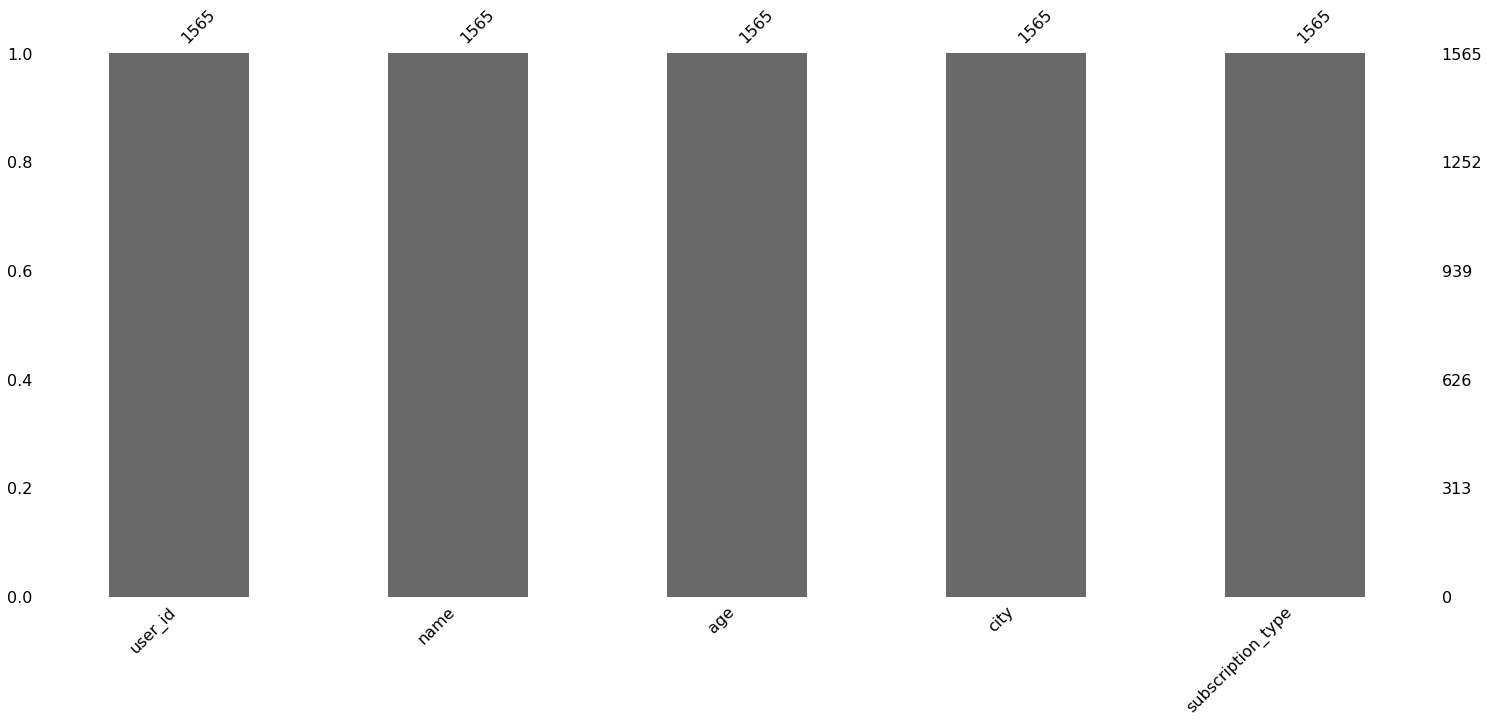

In [17]:
msno.bar(users)

In [18]:
riders.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [19]:
sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропуски в данных отсутствуют.

Приведем дату к необходимому формату.

In [20]:
riders['date'] = pd.to_datetime(riders['date'], format='%Y-%m-%d')

In [21]:
riders.head(10)

,user_id,distance,duration,date
0,1,4409.918945,25.599770,2021-01-01
1,1,2617.592041,15.816872,2021-01-18
2,1,754.159790,6.232113,2021-04-20
3,1,2694.783203,18.511000,2021-08-11
4,1,4028.687256,26.265802,2021-08-28
5,1,2770.890869,16.650139,2021-10-09
6,1,3039.020264,14.927879,2021-10-19
7,1,2842.118164,23.117468,2021-11-06
8,1,3412.690674,15.238072,2021-11-14
9,1,748.690674,15.041883,2021-11-22


Проверим, за какой период предоставлены данные. Если данные предоставлены за несколько лет, то они могут попасть в один и тот же месяц.

In [22]:
riders['date'].dt.year.unique()

array([2021])

Данные предоставлены только за один год, соответственно аномалий не будет.

In [23]:
riders['month'] = pd.DatetimeIndex(riders['date']).month 

In [24]:
riders.head(10)

,user_id,distance,duration,date,month
0,1,4409.918945,25.599770,2021-01-01,1
1,1,2617.592041,15.816872,2021-01-18,1
2,1,754.159790,6.232113,2021-04-20,4
3,1,2694.783203,18.511000,2021-08-11,8
4,1,4028.687256,26.265802,2021-08-28,8
5,1,2770.890869,16.650139,2021-10-09,10
6,1,3039.020264,14.927879,2021-10-19,10
7,1,2842.118164,23.117468,2021-11-06,11
8,1,3412.690674,15.238072,2021-11-14,11
9,1,748.690674,15.041883,2021-11-22,11


Проведем обработку дубликатов.

In [25]:
users.duplicated().sum()

31

In [26]:
users = users.drop_duplicates().reset_index(drop=True)

In [27]:
users.duplicated().sum()

0

In [28]:
riders.duplicated().sum()

0

In [29]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Проведена проверка на пропуски. Пропуски в данных отсутствуют. Дата приведена к необходимому формату. Добавлен отдельный столбец с указанием месяца аренды. Проведен поиск и удаление дубликатов. Неявные дубликаты в данных отсутствуют.

#### Шаг 3. Исследовательский анализ данных

##### Проведем оценку частоты встречаемости городов.

In [30]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Text(0, 0.5, 'Количество пользователей')

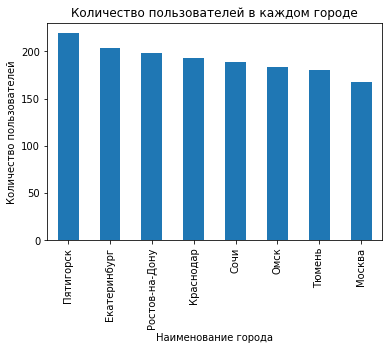

In [31]:
users['city'].value_counts().plot(kind='bar')

plt.title('Количество пользователей в каждом городе');
plt.xlabel('Наименование города')
plt.ylabel('Количество пользователей')


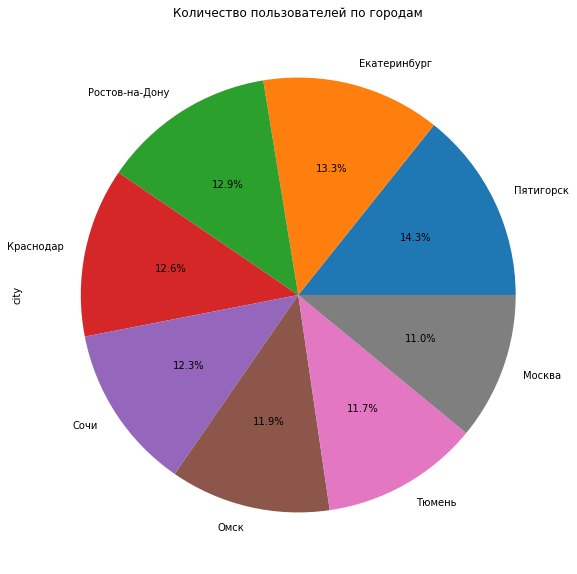

In [32]:
users['city'].value_counts().plot(kind='pie', autopct='%.1f%%', figsize=(10,10));
plt.title('Количество пользователей по городам');

Видим примерно равное распределение пользователей по городам.

#####  Оценка пользователей с подпиской и без.

In [33]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

Пользователей без подписки: 54.4%
Пользователей c подпиской: 45.6%


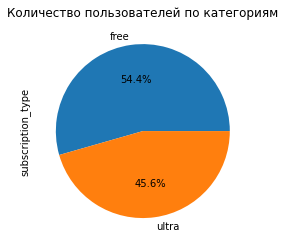

In [34]:
users['subscription_type'].value_counts().plot(kind='pie', autopct='%.1f%%');
plt.title('Количество пользователей по категориям');
print(f'Пользователей без подписки:', '54.4%')
print(f'Пользователей c подпиской:', '45.6%')
 

Пользователей без подписки больше всего приблизительно на 10%. Это говорит об активном использовании подписки.

##### Оценка возраста пользователей

Text(0, 0.5, 'Количество пользователей')

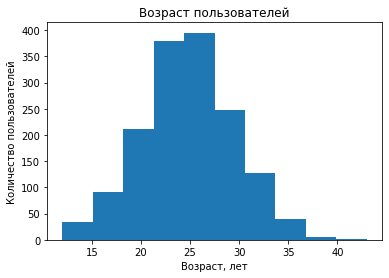

In [35]:
plt.hist(users['age'], bins = 10)
plt.title('Возраст пользователей');
plt.xlabel('Возраст, лет');
plt.ylabel('Количество пользователей')

Распределение возрастов соответствует нормальному. Средний возраст пользователя услугой составляет порядка 25 лет. Люди старше 35 лет и младше 15 арендой самокатов практически не пользуются. Это связано со спецификой данного транспорта, весом самоката и необходимостью иметь определенный уровень физической формы.

##### Оценка расстояния, преодолеваемого за одну поездку.

Text(0, 0.5, 'Количество пользователей')

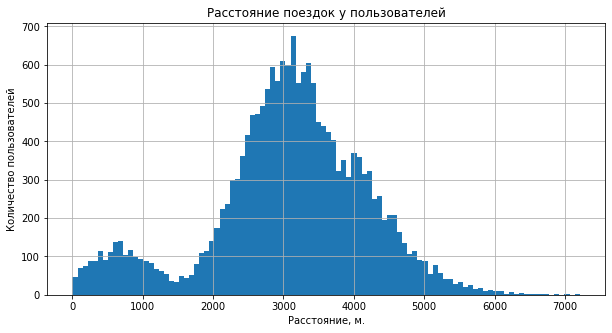

In [36]:
riders['distance'].hist(bins=100, figsize = (10,5))
plt.title('Расстояние поездок у пользователей');
plt.xlabel('Расстояние, м.');
plt.ylabel('Количество пользователей')


In [37]:
riders['distance'].describe()

count    18068.000000
mean      3070.660156
std       1116.831177
min          0.855683
25%       2543.226318
50%       3133.609985
75%       3776.222717
max       7211.007812
Name: distance, dtype: float64

<AxesSubplot:xlabel='distance'>

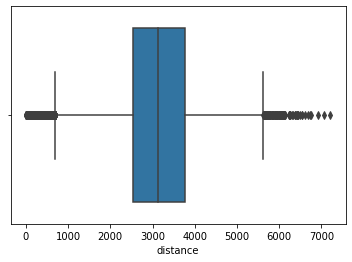

In [38]:
sns.boxplot(x=riders['distance'])

Большинство поездок проходит в диапазоне от 2,5 до 3,5 км. Средняя поездка поездка на самокате составляет порядка 3 км.

##### Оценка продолжительности поездок.

Text(0, 0.5, 'Количество пользователей')

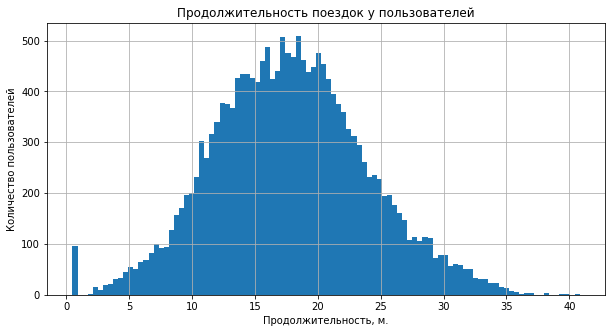

In [39]:
riders['duration'].hist(bins=100, figsize = (10,5))
plt.title('Продолжительность поездок у пользователей');
plt.xlabel('Продолжительность, м.');
plt.ylabel('Количество пользователей')

In [40]:
riders['duration'].describe()

count    18068.000000
mean        17.805012
std          6.091051
min          0.500000
25%         13.597563
50%         17.678394
75%         21.724800
max         40.823963
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration'>

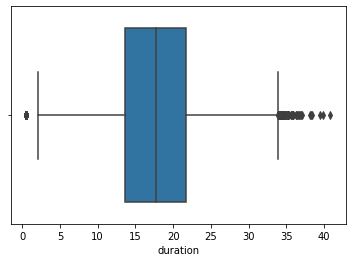

In [41]:
sns.boxplot(x=riders['duration'])

Длительность большинства поездок проходит в диапазоне от 14 до 22 минут. Средняя поездка поездка на самокате занимает порядка 18 минут.

Проведен исследовательский анализ данных, который показал, что в во всех городах сревисом пользуются примерно одинаково, подписку оформляет практически каждый второй пользователь. Сервисом пользуются в основном молодые люди от 20 до 30 лет. За одну поездку в среднем проезжают 3 км, при этом время использования в среднем 18 минут.

#### Шаг 4. Объединение данных

##### Проведем работы по объединению датасетов.

In [42]:
users.shape

(1534, 5)

In [43]:
riders.shape

(18068, 5)

Проведена проврека размеров датасетов. Они имеют по пять столбцов и общий столбец с ID пользователя по которому проведем объединение.

In [44]:
data = users.merge(riders, on='user_id', how='left')


In [45]:
data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.918945,25.599770,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592041,15.816872,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159790,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783203,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687256,26.265802,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2770.890869,16.650139,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039.020264,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842.118164,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3412.690674,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,748.690674,15.041883,2021-11-22,11


In [46]:
sub.shape

(2, 4)

Проведем слияние с третьим датасетом.

In [47]:
data = data.merge(sub)

In [48]:
data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.918945,25.599770,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592041,15.816872,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159790,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783203,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687256,26.265802,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890869,16.650139,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020264,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118164,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690674,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690674,15.041883,2021-11-22,11,6,0,199


In [49]:
data.shape

(18068, 12)

Результирующий датасет имеет 18068 строк, как в максимальном датасете riders и число столбцов соответствующее объединению 3 датасетов - 12 шт.

##### Создадим два дополнительных датасета с данными о пользователях с подпиской и без.

In [50]:
data_free = data[data['subscription_type'] == 'free']

In [51]:
data_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690674,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932617,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434082,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911255,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379395,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098145,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423096,21.409800,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185547,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308594,16.674362,2021-11-27,11,8,50,0


In [52]:
data_ultra = data[data['subscription_type'] == 'ultra']

In [53]:
data_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.918945,25.599770,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592041,15.816872,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159790,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783203,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687256,26.265802,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046387,24.671164,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702637,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159424,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845703,15.839579,2021-10-17,10,6,0,199


##### Проведем оценку расстояния и времени поездок для двух категорий пользователей.

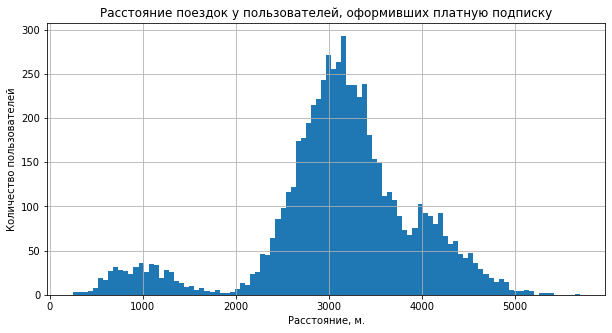

In [54]:
data_ultra['distance'].hist(bins=100, figsize = (10,5))
plt.title('Расстояние поездок у пользователей, оформивших платную подписку');
plt.xlabel('Расстояние, м.');
plt.ylabel('Количество пользователей')
plt.show()

 

In [55]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445557
std       836.895325
min       244.210434
25%      2785.444092
50%      3148.637207
75%      3560.574524
max      5699.769531
Name: distance, dtype: float64

В среднем пользователи с подпиской проезжают порядка 3115м.

Text(0, 0.5, 'Количество пользователей')

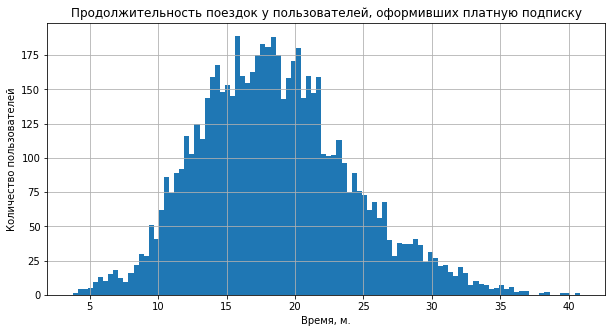

In [56]:
data_ultra['duration'].hist(bins=100, figsize = (10,5))
plt.title('Продолжительность поездок у пользователей, оформивших платную подписку');
plt.xlabel('Время, м.');
plt.ylabel('Количество пользователей')

In [57]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.541986
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884128
max        40.823963
Name: duration, dtype: float64

В среднем пользователи с подпиской тратят на поездку 18.5 минут.

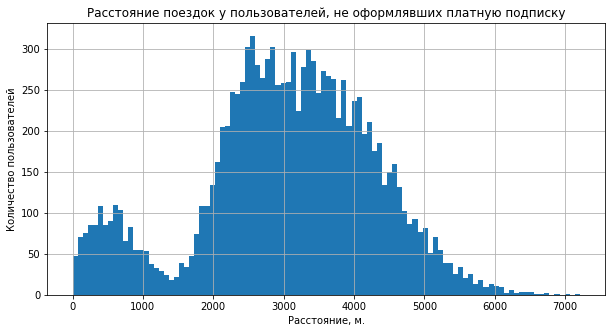

In [58]:
data_free['distance'].hist(bins=100, figsize = (10,5))
plt.title('Расстояние поездок у пользователей, не оформлявших платную подписку');
plt.xlabel('Расстояние, м.');
plt.ylabel('Количество пользователей')
plt.show()

 

In [59]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495117
std       1246.173828
min          0.855683
25%       2366.562622
50%       3114.648438
75%       3905.697876
max       7211.007812
Name: distance, dtype: float64

В среднем пользователи без подписки проезжают около 3045м.

Text(0, 0.5, 'Количество пользователей')

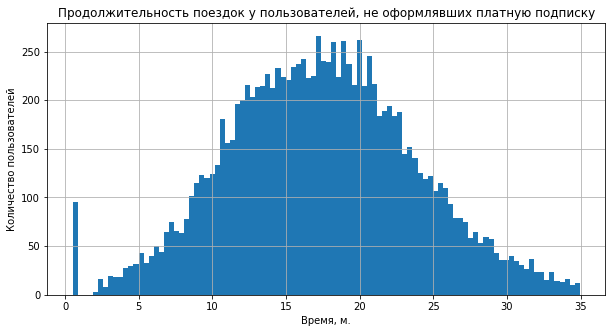

In [60]:
data_free['duration'].hist(bins=100, figsize = (10,5))
plt.title('Продолжительность поездок у пользователей, не оформлявших платную подписку');
plt.xlabel('Время, м.');
plt.ylabel('Количество пользователей')

In [61]:
data_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958436
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

В среднем пользователи без подписки пользуются сервисом в течение 17.4 минуты.

Проведено объединение датасетов, а также выделены два датасета с данными о пользователях с подпиской и без. По результатам анализа датасетов установлено, что без подписки в целом проезжают по расстоянию немного больше, но быстрее по времени относительно пользователей с подпиской. Это может быть связано с более высокой ценой за минуту без подписки.

#### Шаг 5. Подсчёт выручки

##### Создание датафрейма с агрегированными данными о поездках.

In [62]:
data_travel = data.pivot_table(index = ['user_id', 'month'], values = ['distance', 'duration', 'name','subscription_type' ], aggfunc = {'distance':'sum', 'duration':'sum', 'name':'count', 'subscription_type': 'min'})

In [63]:
data_travel.columns = ['total_distance', 'total_duration', 'travel_count', 'subscription_type']

Проведем провперку на пропуски в сводной таблице.

In [64]:
data_travel.isna().sum()

total_distance       0
total_duration       0
travel_count         0
subscription_type    0
dtype: int64

In [65]:
data_travel

total_distance  total_duration  travel_count subscription_type
user_id month                                                                
1       1         7027.510742       41.416641             2             ultra
        4          754.159790        6.232113             1             ultra
        8         6723.470703       44.776802             2             ultra
        10        5809.911133       31.578018             2             ultra
        11        7003.499512       53.397423             3             ultra
...                       ...             ...           ...               ...
1534    6         3409.468506       24.812677             2              free
        8         7622.453125       47.205959             2              free
        9         4928.173828       22.560373             1              free
        11       13350.015625       76.342178             4              free
        12        2371.711182       15.893917             1              free

[11331 rows x 4 columns]

Округлим значения в столбце продолжительность поездки.

In [66]:
data_travel['total_duration'] = np.ceil(data_travel['total_duration'])

Получена сводная таблица со структурированными данными пользователей по проиденной дистанции, времени пользования самокатом, количеству поездок и месяцем использования самоката.

##### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [67]:
def money(row):
    total_distance = row['total_distance']
    total_duration = row['total_duration']
    travel_count = row['travel_count']
    subscription_type = row['subscription_type']
    
    if subscription_type == 'free':
        return (50 * travel_count) + (8 * total_duration)
    elif subscription_type == 'ultra':
        return (6 * total_duration) + 199
    

In [68]:
data_travel['income'] = data_travel.apply(money, axis = 1)

In [69]:
data_travel.head(10)

total_distance  total_duration  travel_count subscription_type  \
user_id month                                                                   
1       1         7027.510742            42.0             2             ultra   
        4          754.159790             7.0             1             ultra   
        8         6723.470703            45.0             2             ultra   
        10        5809.911133            32.0             2             ultra   
        11        7003.499512            54.0             3             ultra   
        12        6751.629883            28.0             2             ultra   
2       3        10187.722656            61.0             3             ultra   
        4         6164.381836            40.0             2             ultra   
        6         3255.338135            14.0             1             ultra   
        7         6780.722656            47.0             2             ultra   

               income  
user_id month          
1       1       451.0  
        4       241.0  
        8       469.0  
        10      391.0  
        11      523.0  
        12      367.0  
2       3       565.0  
        4       439.0  
        6       283.0  
        7       481.0

Был создан новый датафрейм с агрегированными данными на основе датафрейма с объединенными данными.

Были найдены суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавлен столбец с помесячной выручкой, которую принес каждый пользователь.

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки.

In [70]:
ultra = data_ultra['duration'] 



In [71]:
free = data_free['duration']

Проверим гипотезу: пользователи с подпиской тратят столько же времени на поездки, как и без подписки.

H_0: Время пользования с подпиской (ultra) равно времени пользования без подписки (free)

H_1: Время пользования с подпиской (ultra) больше времени пользования без подписки (free)

In [72]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(ultra, free, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2801722407147585e-34
Отвергаем нулевую гипотезу


In [73]:
print('Средняя продолжительность аренды у пользователей с подпиской:',
      round(data_ultra['duration'].mean(), 2), 'минут, а у пользователей без подписки',
      round(data_free['duration'].mean(), 2), 'минут')
print()
print('В среднем пользователи с подпиской арендуют самокат на',
      round(round(data_ultra['duration'].mean(), 2) - round(data_free['duration'].mean(), 2), 2),
      'минут больше, чем пользователи без подписки.')

Средняя продолжительность аренды у пользователей с подпиской: 18.54 минут, а у пользователей без подписки 17.39 минут

В среднем пользователи с подпиской арендуют самокат на 1.15 минут больше, чем пользователи без подписки.


Проверили гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free.Гипотеза была отвергнута. В среднем пользователи с подпиской арендуют самокат на большее время, но это время незначительно и составляет чуть более минуты.

##### Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

In [74]:
ultra_distance = data_ultra['distance'] 



Проверим гипотезу: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.

H_0: Расстояние (ultra_distance) пользователей на подписке ultra = 3130 метров

H_1: Расстояние (ultra_distance) пользователей на подписке ultra > 3130 метров

In [75]:
distance_value = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    ultra_distance, 
    distance_value,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195344662352914
Не отвергаем нулевую гипотезу


In [76]:
ultra_distance.mean()

3115.4456

In [77]:
ultra_distance.median()

3148.6372

Проверили гипотезу, и мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra  превышает 3130 метров. Хотя среднее значение суть менее этого порога, медиана все-таки больше, что говорит о том, что больше половины пользователей проезжают необходимое количество метров.

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [78]:
ultra_income = data_travel.loc[data_travel['subscription_type'] == 'ultra', 'income']

In [79]:
ultra_income

user_id  month
1        1        451.0
         4        241.0
         8        469.0
         10       391.0
         11       523.0
                  ...  
699      6        301.0
         8        469.0
         9        385.0
         10       295.0
         12       355.0
Name: income, Length: 4533, dtype: float64

In [80]:
free_income = data_travel.loc[data_travel['subscription_type'] == 'free', 'income']

Проверим гипотезу: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

H_0: Выручка (ultra_income) пользователей на подписке ultra = выручка (free_income) пользователей на подписке free

H_1: Выручка (ultra_income) пользователей на подписке ultra > выручка (free_income) пользователей на подписке free

alpha = 0.05

In [81]:
alpha = 0.05 

results = st.ttest_ind(ultra_income, free_income, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8130926188487286e-35
Отвергаем нулевую гипотезу


In [82]:
ultra = data_travel.query('subscription_type == "ultra"')
free = data_travel.query('subscription_type == "free"')
alpha = 0.05
results = st.ttest_ind(ultra['income'],free['income'], equal_var=False, alternative = 'greater')
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print()
print('В среднем в месяц пользователи с подпиской тратят на аренду самокатов',
      round(ultra['income'].mean(), 2), 'руб',
      ', а пользователи без подписки', round(free['income'].mean(), 2), 'руб')
print()
 
print('В среднем пользователи с подпиской приносят компании на',
      round(round(ultra['income'].mean(), 2) - round(free['income'].mean(),2),2),
      'руб больше, чем пользователи без платной подписки')

p-значение: 1.0718729651261336e-44
Отвергаем нулевую гипотезу

В среднем в месяц пользователи с подпиской тратят на аренду самокатов 361.48 руб , а пользователи без подписки 325.84 руб

В среднем пользователи с подпиской приносят компании на 35.64 руб больше, чем пользователи без платной подписки


Проверили гипотезу, соответственно, мы можем утверждать, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free.

##### Количество обращений в техподдержку значимо снизилось

Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.

Гипотезы будут сформулированы так:

H0 : μ1 = μ2
H1 : μ1 != μ2
где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод которым можно проверять гипотезу должен проверять одну генеральную совокупность, с которой произошли некоторые изменения. В этом случае проверяется равны ли средние совокупности до и после этого изменения.

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

Проведена проверка гипотез о том тратят ли пользователи с подпиской больше времени на поездки, которая показала, что пользователи с подпиской используют самокат немного дольше. 
Проведена проверка гипотезы, что пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку. По результатам проверки  мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров.
Проведена проверка гипотезы, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free, которая подтвердилась.
Определен метод для оценки изменения обращений в службу поддержки после замены сервера Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel().


#### Шаг 7. Распределения

In [83]:
n = 1000 # задайте параметры 
p = 0.1 # биномиального распределения

mu = n*p # рассчитайте параметры 
sigma =sqrt(n*p*(1-p)) # нормального распределения

distr = st.norm(mu, sigma) # задайте нормальное распределение

result = 1- distr.cdf(100) # найдите вероятность
print(result)

0.5


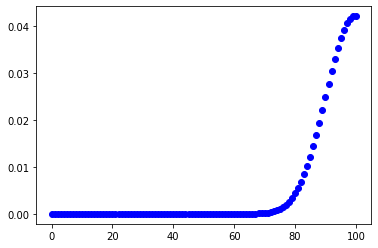

In [84]:
lmbd = n * p
max_value = 100
binom_probs = []
poisson_probs = []
# для всех значений от 0 до 10
for k in range(max_value + 1):
    # рассчитываем значения вероятности для биномиального распределения
    # и распределения Пуассона
    binom_prob = binom.pmf(k, n, p)
    poisson_prob = poisson.pmf(k, lmbd)
    # добавляем в соответствующие списки
    binom_probs.append(binom_prob)
    poisson_probs.append(poisson_prob)
plt.plot(range(max_value + 1), binom_probs, 'bo',
         label=f'Биномиальное распределение с n={n} и p={p}')

Вывод.


Было рассмотрено 3 датасета с информацией о пользователях сревисом проката самокатов, поездках и информацией о подписках. Проведена проверка на пропуски в данных для каждого датасета. Пропускив данных отсутствуют. Дата была приведена к необходимому формату. Добавлен отдельный столбец с указанием месяца аренды. Проведен поиск и удаление дубликатов. Неявные дубликаты в данных отсутствуют. 

Проведена оценка частоты встречаемости городов. Определено примерно равное распределение пользователей по городам. Проведена оценка пользователей с подпиской и без. Пользователей без подписки больше всего приблизительно на 10%. Это говорит об активном использовании подписки. Проведена оценка возраста пользователей. Распределение возрастов соответствует нормальному. Средний возраст пользователя услугой составляет порядка 25 лет. Люди старше 35 лет и младше 15 арендой самокатов практически не пользуются. Это связано со спецификой данного транспорта, весом самоката и необходимостью иметь определенный уровень физической формы. Проведена оценка расстояния, преодолеваемого за одну поездку. Большинство поездок проходит в диапазоне от 2,5 до 3,5 км. Средняя поездка поездка на самокате составляет порядка 3 км. Длительность большинства поездок проходит в диапазоне от 14 до 22 минут. Средняя поездка поездка на самокате занимает порядка 18 минут. Для развития бизнеса можно предложить меры, анправленные на привлечение более старшей категории людей (от 35 до 50 лет).  


Проведено объединение датасетов, а также выделены два датасета с данными о пользователях с подпиской и без. По результатам анализа датасетов установлено, что без подписки в целом проезжают по расстоянию немного больше, но быстрее по времени относительно пользователей с подпиской.

Был создан новый датафрейм с агрегированными данными на основе датафрейма с объединенными данными.
Были найдены суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавлен столбец с помесячной выручкой, которую принес каждый пользователь.


Проведена проверка гипотез о том тратят ли пользователи с подпиской больше времени на поездки, которая показала, что пользователи с подпиской используют самокат немного дольше, но это время незначительно и составляет чуть более минуты. Возможно внедрение каких-то скидок за длительное пользование самокатом, для того чтобы повысить среднее время использования.
Проведена проверка гипотезы, что пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку. По результатам проверки  мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров. В среднем пройденное расстояние находится в районе этого показателя. Если мы хотим увеличить время пользования услугой, то мы должны понимать, что пройденное расстояние тоже может увеличиваться. Это приведет к снижению ресурса самокатов. Как одно из решений - снижение максимальной скорости езды самоката. Это приведет к снижению травматичности, но  также увеличит ресурс оборудования.
Проведена проверка гипотезы, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free, которая подтвердилась. В среднем выручка с пользователей с подпиской на 10% выше, что говорит о необходимости повышать их долю в общем числе клиентов. Для этого необходимо проведение акций на подписку, возможно включение пробного периода пользования при подписке на другие сервисы компании и т.д.
Определен метод для оценки изменения обращений в службу поддержки после замены сервера Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel().

В общем, анализ сервиса проката самокатов показал, что он пользуется спросом в во всех представленных локациях. Сервис приности прибыль. Для его дальнейшего развития необходимо уделить особое внимание привлечению людей к приобретению подписки на данный сервис, так как она приносит дополнительный доход.
